## Download dataset

In [2]:
# dataset from https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv
import requests

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv'
response = requests.get(url)

with open('penguins_data.csv', 'wb') as file:
    file.write(response.content)

## Explore and clean the data

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('penguins_data.csv')

In [5]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
# drop rows with missing values
df = df.dropna(subset=['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [8]:
len(df)

342

In [9]:
# select only columns with relevant features
df = df[['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [10]:
df.head()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0  Adelie            39.1           18.7              181.0       3750.0
1  Adelie            39.5           17.4              186.0       3800.0
2  Adelie            40.3           18.0              195.0       3250.0
4  Adelie            36.7           19.3              193.0       3450.0
5  Adelie            39.3           20.6              190.0       3650.0

In [11]:
df['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [12]:
features = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()
values = df['species'].to_numpy()

## Scale and encode the data

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [14]:
features

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]], shape=(342, 4))

In [15]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [16]:
values

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [17]:
# one-hot encode the species
encoder = LabelEncoder()
values_encoded = encoder.fit_transform(values)

In [18]:
values_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [19]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, values_encoded, test_size=0.2, random_state=42)

### Try out some models

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = clf.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred, target_names=['Adelie', 'Gentoo', 'Chinstrap']))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        35
      Gentoo       0.92      1.00      0.96        12
   Chinstrap       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



In [24]:
print(confusion_matrix(y_test, y_pred))

[[34  1  0]
 [ 0 12  0]
 [ 0  0 22]]


In [26]:
clf.predict_proba(X_test[:4])

array([[2.43316874e-03, 1.08422977e-02, 9.86724534e-01],
       [9.99192006e-01, 7.71119169e-04, 3.68744421e-05],
       [9.95382486e-01, 4.57623344e-03, 4.12810025e-05],
       [8.75121168e-01, 1.19155948e-01, 5.72288365e-03]])

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
rf.score(X_test, y_test)

0.9565217391304348

In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
coefficients = clf.coef_

### Explore the feature importance

Plot logistic regression coefficients

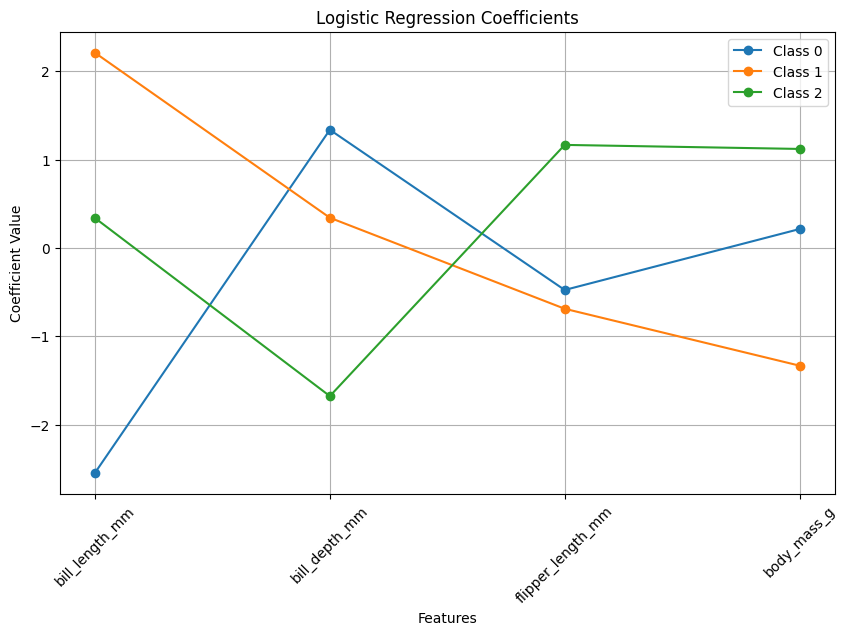

In [32]:
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[0]):
    plt.plot(np.arange(coefficients.shape[1]), coefficients[i], marker='o', label=f'Class {i}')

plt.xticks(np.arange(coefficients.shape[1]), ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.legend()
plt.grid(True)
plt.show()

### Make a prediction on new data